# Processing historical GHGs concentrations

In [ ]:
import os
import pandas as pd
import numpy as np

# Make sure the path is correct
print("Current Directory:", os.getcwd())
# base_dir = os.path.dirname(os.path.abspath(__file__))         # Directory of this script

# Load the file
if os.path.exists('../forcings/GHGs'):
    try:
        file_path = os.path.join(os.getcwd(),'../forcings/GHGs/Supplementary_Table_UoM_GHGConcentrations-1-1-0_annualmeans_v2.xls')
        df_raw_ghgs = pd.ExcelFile(file_path, engine='xlrd')
        print("File loaded successfully!")
    except Exception as e:
        print(f"Error reading the Excel file: {e}")
else:
    print(f"Directory does not exist: {os.getcwd()+'../forcings/GHGs'}")

# Process the exact sheet from the file we are interested in
print(f"Available sheets including {df_raw_ghgs.sheet_names}")  # Get sheet names
# Read the historical global annual mean data
df_ann_glb_raw = pd.read_excel(file_path, sheet_name='historical-annualmean-Global', header=None)
# postprocess
units = df_ann_glb_raw.iloc[20]                                 # Units (ppm, ppb, etc.)
gases = df_ann_glb_raw.iloc[21]                                 # Gas names (CO2, CH4, etc.)
df_ann_glb = df_ann_glb_raw.iloc[22:].reset_index(drop=True)    # skip 21 rows non-data   
df_ann_glb.columns = df_ann_glb_raw.iloc[21]                    # set gases as columns
df_ann_glb = df_ann_glb.set_index('v YEARS/GAS >')              # set years as index
df_ann_glb = df_ann_glb.rename_axis(index='Years')              # rename the index
print(df_ann_glb.columns)

Current Directory: c:\Users\nd20983\docs\Github\cmip7\scripts
File loaded successfully!
Available sheets including ['Readme', 'historical-annualmean-Global', 'historical-Table', 'Ranking', 'picontrol-annualmean-Global', 'picontrol-Table', 'abrupt4x-annualmean-Global', '1pctCO2-annualmean-Global', '1pctCO2-Table', 'allGHGs-Global', 'allGHGs-NH', 'allGHGs-SH', 'CFC-12-eq', 'HFC-134a-eq', 'CFC-11-eq', 'CO2', 'CH4', 'N2O', 'HFC-134a', 'HFC-23', 'HFC-32', 'HFC-125', 'HFC-143a', 'HFC-152a', 'HFC-227ea', 'HFC-236fa', 'HFC-245fa', 'HFC-365mfc', 'HFC-43-10mee', 'NF3', 'SF6', 'SO2F2', 'CF4', 'C2F6', 'C3F8', 'C4F10', 'C5F12', 'C6F14', 'C7F16', 'C8F18', 'c-C4F8', 'CFC-12', 'CFC-11', 'CFC-113', 'CFC-114', 'CFC-115', 'HCFC-22', 'HCFC-141b', 'HCFC-142b', 'CH3CCl3', 'CCl4', 'CH3Cl', 'CH2Cl2', 'CHCl3', 'CH3Br', 'Halon-1211', 'Halon-1301', 'Halon-2402']
Index(['CO2', 'CH4', 'N2O', 'HFC-134a', 'HFC-23', 'HFC-32', 'HFC-125',
       'HFC-143a', 'HFC-152a', 'HFC-227ea', 'HFC-236fa', 'HFC-245fa',
       'HFC

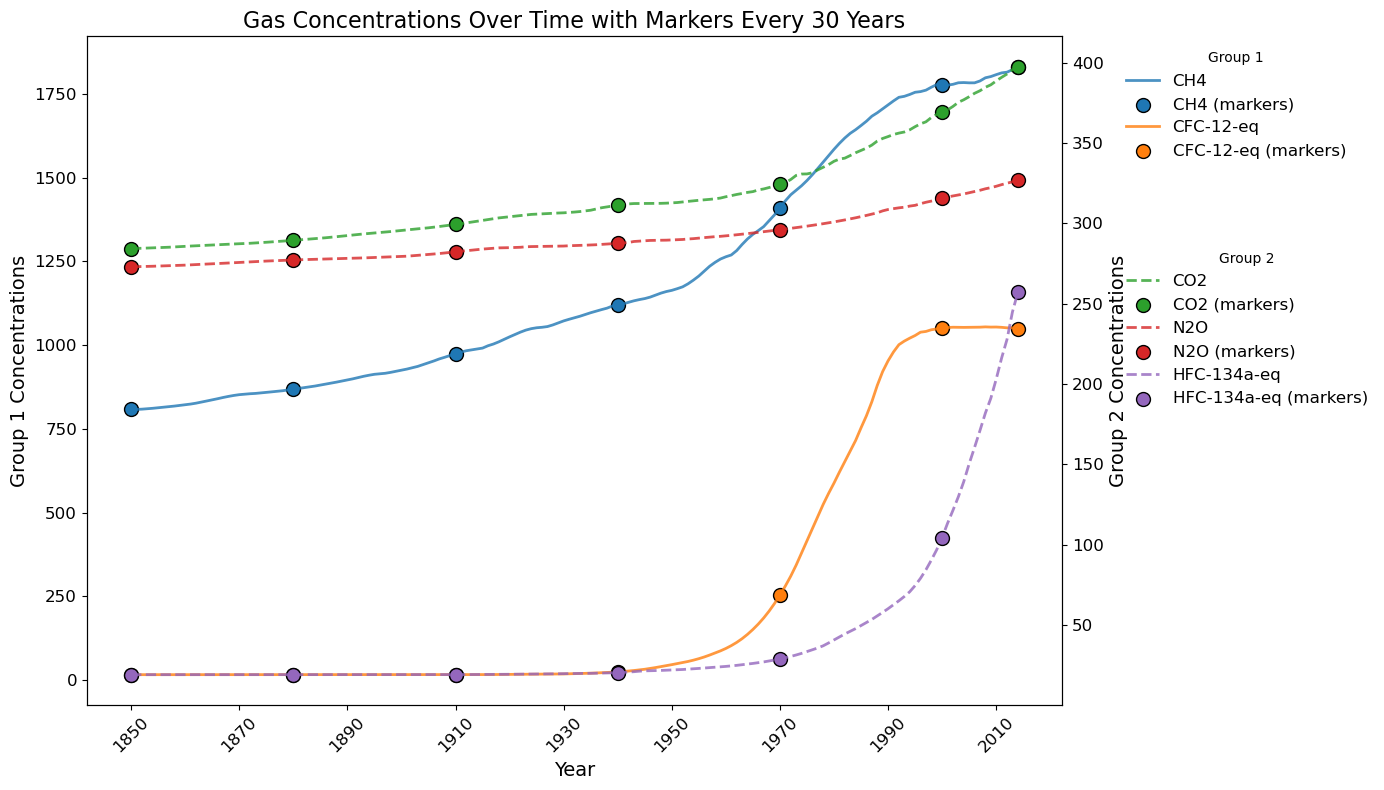

In [59]:
import matplotlib.pyplot as plt

# Define groups of gases
group1 = ['CH4', 'CFC-12-eq']  # Group 1
group2 = ['CO2', 'N2O', 'HFC-134a-eq']  # Group 2

years = df_ann_glb.index  # X-axis (Years)
data_group1 = df_ann_glb[group1]  # Data for group 1
data_group2 = df_ann_glb[group2]  # Data for group 2

# Define years to mark (every 30 years starting from 1850)
marker_years = range(1850, int(years.max()) + 1, 30)

# Create the plot
fig, ax_main = plt.subplots(figsize=(14, 8))
ax_group2 = ax_main.twinx()  # Create a secondary axis for group 2

# Define colors for groups
color_group1 = ['tab:blue', 'tab:orange']
color_group2 = ['tab:green', 'tab:red', 'tab:purple']

# Plot group 1 gases with markers
for idx, var in enumerate(group1):
    ax_main.plot(years, data_group1[var], linestyle='-', color=color_group1[idx], alpha=0.8, label=var, linewidth=2)
    ax_main.scatter(
        [y for y in marker_years if y in years],
        data_group1.loc[[y for y in marker_years if y in years], var],
        marker='o',
        color=color_group1[idx],
        s=100,  # Marker size
        edgecolor='black',
        label=f'{var} (markers)',
    )
    # Add a special circle for the year 2014
    ax_main.scatter(2014, data_group1.loc[2014, var], marker='o', color=color_group1[idx], s=100, edgecolor='black',)

# Plot group 2 gases with markers on secondary axis
for idx, var in enumerate(group2):
    ax_group2.plot(years, data_group2[var], linestyle='--', color=color_group2[idx], alpha=0.8, label=var, linewidth=2)
    ax_group2.scatter(
        [y for y in marker_years if y in years],
        data_group2.loc[[y for y in marker_years if y in years], var],
        marker='o',
        color=color_group2[idx],
        s=100,  # Marker size
        edgecolor='black',
        label=f'{var} (markers)',
    )
    # Add a special circle for the year 2014
    ax_group2.scatter(2014, data_group2.loc[2014, var], marker='o', color=color_group2[idx], s=100, edgecolor='black',)

# Labels and titles
ax_main.set_ylabel("Group 1 Concentrations", fontsize=14)
ax_group2.set_ylabel("Group 2 Concentrations", fontsize=14)
ax_main.set_xlabel("Year", fontsize=14)
ax_main.set_title("Gas Concentrations Over Time with Markers Every 30 Years", fontsize=16)

# Customize x-axis ticks
ax_main.set_xticks(range(int(years.min()), int(years.max()) + 1, 20))  # Tick every 20 years
ax_main.tick_params(axis='x', rotation=45, labelsize=12)
ax_main.tick_params(axis='y', labelsize=12)
ax_group2.tick_params(axis='y', labelsize=12)

# Legends
ax_main.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, title="Group 1", frameon=False)
ax_group2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.7), fontsize=12, title="Group 2", frameon=False)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()
